<a href="https://colab.research.google.com/github/Abhiss123/AlmaBetter-Projects/blob/main/Neural_Architecture_Search_for_Enhanced_Content_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name : Neural Architecture Search for Enhanced Content Insights**

### Purpose of the Project:

The project **“Neural Architecture Search for Enhanced Content Insights”** aims to combine the strengths of **Neural Architecture Search (NAS)** and **Topic Modeling** to create a more intelligent and automated approach for analyzing and categorizing web content. Let’s break down the purpose and utility of this project in simpler terms for better understanding:

1. **Neural Architecture Search (NAS)**:
   - **Definition**: Neural Architecture Search is an automated method for designing and optimizing neural networks. Instead of manually selecting the architecture (layers, neurons, activation functions), NAS automates this process to find the best-performing model for a specific task.
   - **Relevance to Content Analysis**: By using NAS, this project aims to build optimal neural networks that are specifically tailored to extract meaningful insights from text data. This approach ensures that the models used are the most efficient and accurate for the task at hand, whether it’s classifying content, predicting keyword relevance, or clustering similar topics.

2. **Combining NAS with Topic Modeling**:
   - **What is Topic Modeling?**: Topic modeling is a technique that identifies abstract topics within a collection of documents. It helps categorize content into different themes based on frequently occurring words and their relationships.
   - **Why Include NAS?**: Traditionally, topic models like LDA (Latent Dirichlet Allocation) or NMF (Non-negative Matrix Factorization) work well for grouping documents, but they might not be flexible enough to capture deeper patterns in the data. By integrating NAS, the project enhances these models with deep learning capabilities, allowing the system to not only categorize but also provide advanced keyword insights and patterns.

3. **Purpose in Content Insights**:
   - **Content Categorization**: The model can automatically classify different types of web content into distinct categories (e.g., SEO Services, Digital Marketing, Competitor Analysis) without human intervention.
   - **Keyword Mapping and Analysis**: The NAS-based model can highlight which keywords are most relevant for each category, giving website owners insights into how their content is perceived and which topics are overrepresented or underrepresented.
   - **Topic Clustering**: This system can identify similar clusters of content, making it easy to spot areas where content might overlap or where there are gaps in coverage.
   - **Enhanced Decision-Making for SEO**: By understanding the key topics and keywords associated with different clusters, website owners can decide which topics to focus on, which content to refine, and how to better structure their content strategy.

4. **Utility for Website Owners**:
   - **Why is this approach beneficial?** NAS automates the process of finding the best network architecture, so the model is always optimized for its purpose. This means website owners get the best results in terms of categorizing their content and gaining insights.
   - **Actionable Insights**: Unlike standard topic models, which just show word distributions, this NAS-based model offers deeper, more actionable insights such as which keywords are strongly associated with which topics, how different pieces of content relate to each other, and which areas to improve.

5. **Why is it an alternative to traditional models?**
   - Traditional topic models like LDA are simpler but lack the flexibility and optimization that NAS provides.
   - NAS allows for dynamic model adjustments, ensuring that the architecture is best suited for extracting patterns in complex text data.
   - This flexibility means that the project can adapt to new data, making it future-proof and scalable, which is critical for businesses that are continually updating their content.




### **Understanding Neural Architecture Search (NAS)**

**Neural Architecture Search (NAS)** is a process that automates the design of neural networks, making it easier to find the best-performing model for a specific task without needing manual intervention from human experts. Think of NAS as a smart assistant that tries various network designs and selects the most optimal one based on the performance metrics (e.g., accuracy, speed, or memory efficiency).

#### **Use Cases and Real-Life Implementations**
NAS is widely used in various fields, such as image recognition, natural language processing, and automated machine learning. For instance, companies use NAS to build models that can classify images accurately or create deep learning models for understanding human language in chatbots. One notable real-life application is Google’s AutoML, which employs NAS to automatically generate high-quality machine learning models for different applications.

#### **NAS in the Context of Websites**
For a website owner, NAS can be particularly valuable for tasks like keyword prediction, content classification, user behavior prediction, and enhancing recommendation engines. Imagine you have a content-heavy website and want to identify the best model to classify articles into different categories (e.g., sports, technology, health). With NAS, you can automate this process by testing numerous network architectures to find the one that categorizes your content most accurately and efficiently. This means it can help identify which keywords to focus on or classify user-generated content automatically, improving the user experience.

#### **Data Requirements for NAS**
NAS doesn’t directly work with URLs or raw website pages. Instead, it typically requires structured data such as text files, CSVs, or any other format that provides relevant features and labels for training a model. For website content, you might extract data such as *titles, keywords, meta descriptions, text content,* and *user interaction metrics*. This data can be in a structured format (e.g., CSV files) with columns representing different features of the website (like "Page Title," "Meta Description," "Category Label," etc.). The NAS algorithm will then use this data to search for the best neural network architecture to predict categories or keywords.

#### **How Does NAS Optimize Models for Keyword Prediction or Content Classification?**
NAS works by testing various combinations of network layers, activations, and other configurations to identify the optimal architecture for a given task. For example, if the goal is keyword prediction, the NAS system will explore different network structures to see which one predicts the right keywords with the highest accuracy. Similarly, for content classification, it will try out different models to ensure that the one selected classifies the content correctly into predefined categories. By automating this search, NAS saves time and computational resources, allowing for faster development of high-performance models.


In [ ]:
# Step 1: Import necessary libraries for web content extraction, text processing, and clustering
import requests  # Used to send HTTP requests to get webpage content
from bs4 import BeautifulSoup  # Helps in parsing and extracting text from HTML content
import pandas as pd  # Library for data manipulation and organization
import re  # Regular expressions to perform text cleaning
import nltk  # Natural Language Toolkit, a library for text processing tasks
from sklearn.feature_extraction.text import TfidfVectorizer  # Tool for converting text to numerical vectors
from sklearn.cluster import KMeans  # Machine Learning algorithm for grouping similar items together
from collections import defaultdict  # Organizes data in a structured format

# Download and load stopwords (common English words like "the", "and") for text cleaning
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# Step 2: Define a function to extract and clean text content from a webpage
def extract_content(url):
    """
    This function takes a URL as input, retrieves its HTML content,
    removes unnecessary tags and characters, and returns clean text.
    """
    # Step 2.1: Fetch webpage content using the URL
    response = requests.get(url)

    # Step 2.2: Parse the HTML using BeautifulSoup to make it easy to navigate and extract
    soup = BeautifulSoup(response.content, 'html.parser')

    # Step 2.3: Remove unnecessary elements like JavaScript and CSS code
    for script in soup(['script', 'style']):
        script.decompose()

    # Step 2.4: Extract only visible text from <p> (paragraph) tags
    text = ' '.join([p.get_text() for p in soup.find_all('p')])

    # Step 2.5: Clean the extracted text
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = text.lower()  # Convert all text to lowercase for consistency
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    # Remove stopwords (common words like "and", "the", which do not contribute to meaning)
    text = ' '.join([word for word in text.split() if word not in STOPWORDS])

    return text

# Step 3: List of URLs to extract content from
urls = [
    'https://thatware.co/',
    'https://thatware.co/services/',
    'https://thatware.co/advanced-seo-services/',
    'https://thatware.co/digital-marketing-services/',
    'https://thatware.co/business-intelligence-services/',
    'https://thatware.co/link-building-services/',
    'https://thatware.co/branding-press-release-services/',
    'https://thatware.co/conversion-rate-optimization/',
    'https://thatware.co/social-media-marketing/',
    'https://thatware.co/content-proofreading-services/',
    'https://thatware.co/website-design-services/',
    'https://thatware.co/web-development-services/',
    'https://thatware.co/app-development-services/',
    'https://thatware.co/website-maintenance-services/',
    'https://thatware.co/bug-testing-services/',
    'https://thatware.co/software-development-services/',
    'https://thatware.co/competitor-keyword-analysis/'
]

# Step 4: Create a dictionary to store cleaned text content for each URL
content_dict = {}
for url in urls:
    print(f"Extracting content from: {url}")  # Inform the user which URL is being processed
    content_dict[url] = extract_content(url)  # Store cleaned text for each URL in the dictionary

# Step 5: Create a DataFrame to organize the data for further analysis
# Each row in this DataFrame represents a URL and its corresponding cleaned text content
data = pd.DataFrame(list(content_dict.items()), columns=['URL', 'Content'])

# Step 6: Text Vectorization using TF-IDF (Term Frequency-Inverse Document Frequency)
# This converts the cleaned text into numerical values for machine learning analysis
vectorizer = TfidfVectorizer(max_features=1000)  # Limit the number of features to the top 1000 words
X = vectorizer.fit_transform(data['Content'])  # Convert text data into a matrix of numerical values

# Step 7: Applying K-Means Clustering
# K-Means is a popular clustering algorithm that groups similar items together
# Setting the number of clusters (groups) to 5 based on the content's topics
kmeans = KMeans(n_clusters=5, random_state=42)  # Fixing random_state ensures the same results each time
data['Cluster'] = kmeans.fit_predict(X)  # Assign each URL to one of the 5 clusters

# Step 8: Display keywords for each cluster
# This function extracts the top keywords for each cluster, which helps identify the main topics in each group
def get_top_keywords(vectorizer, kmeans_model, n_terms):
    """
    Extracts the top n_terms keywords for each cluster.
    Shows what each group of URLs is mainly about.
    """
    keywords = {}  # Dictionary to store keywords for each cluster
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]  # Order by importance
    terms = vectorizer.get_feature_names_out()  # Get the names of each term/word
    for i in range(kmeans_model.n_clusters):  # Loop through each cluster
        keywords[i] = [terms[ind] for ind in order_centroids[i, :n_terms]]  # Get top keywords
    return keywords

# Get the top 10 keywords for each cluster and display them
top_keywords = get_top_keywords(vectorizer, kmeans, 10)
for cluster_num, keywords in top_keywords.items():
    print(f"Cluster {cluster_num} Top Keywords: {', '.join(keywords)}")

# Step 9: Map URLs to their respective clusters
url_to_cluster = defaultdict(list)
for idx, row in data.iterrows():
    cluster = row['Cluster']
    url = row['URL']
    url_to_cluster[cluster].append(url)

# Step 10: Display URL-to-cluster mapping
# This helps identify which URLs are grouped together based on their content
print("\n=== URL-to-Cluster Mapping ===")
for cluster, urls in url_to_cluster.items():
    print(f"Cluster {cluster}:")
    for url in urls:
        print(f" - {url}")

# Step 11: Save the results to a CSV file for record-keeping or future analysis
data.to_csv('url_cluster_mapping.csv', index=False)  # Save DataFrame to a CSV file
print("\nCluster assignments saved to 'url_cluster_mapping.csv'.")  # Confirmation message


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Extracting content from: https://thatware.co/
Extracting content from: https://thatware.co/services/
Extracting content from: https://thatware.co/advanced-seo-services/
Extracting content from: https://thatware.co/digital-marketing-services/
Extracting content from: https://thatware.co/business-intelligence-services/
Extracting content from: https://thatware.co/link-building-services/
Extracting content from: https://thatware.co/branding-press-release-services/
Extracting content from: https://thatware.co/conversion-rate-optimization/
Extracting content from: https://thatware.co/social-media-marketing/
Extracting content from: https://thatware.co/content-proofreading-services/
Extracting content from: https://thatware.co/website-design-services/
Extracting content from: https://thatware.co/web-development-services/
Extracting content from: https://thatware.co/app-development-services/
Extracting content from: https://thatware.co/website-maintenance-services/
Extracting content from: ht

### Explanation of the Output

The output shows the results of clustering content from various pages of a website. The goal of this process was to group similar topics together and identify key themes within each group using keyword analysis. Each cluster (0 through 4) represents a distinct group of related content, and the "Top Keywords" in each cluster indicate the most common and significant terms in those groups. Here’s a detailed breakdown:

1. **Cluster 0 Top Keywords**: `ai, data, branding, social, digital, business, media, marketing, services, seo`
   - **Explanation**: This cluster includes content focused on AI-driven digital marketing strategies, branding, social media, and business intelligence. It likely represents services that combine AI and data-driven techniques to enhance digital marketing efforts, SEO strategies, and social media branding.
   - **Suggested Action**: Emphasize AI and data-driven solutions in your website's messaging, specifically targeting businesses looking for modern and advanced digital marketing techniques. This cluster suggests you should create more content around AI’s role in digital marketing and showcase your expertise in integrating AI into business strategies.

2. **Cluster 1 Top Keywords**: `link, keyword, design, building, web, development, business, website, services, seo`
   - **Explanation**: This cluster is centered around link-building services, keyword strategies, web design, and SEO. The focus here is on improving a website’s visibility through SEO tactics and enhancing the website’s structure and design.
   - **Suggested Action**: Create more case studies or blog posts that demonstrate successful link-building strategies and web design improvements. Consider optimizing content for keywords related to link building, web development, and on-page SEO, as these are the core themes in this cluster.

3. **Cluster 2 Top Keywords**: `search, artificial, 753, data, google, advanced, algorithms, services, ai, seo`
   - **Explanation**: This cluster likely focuses on advanced SEO techniques, artificial intelligence, and Google’s search algorithms. It highlights a deep technical understanding of how search engines work and how to leverage AI for SEO.
   - **Suggested Action**: Position your business as an expert in advanced SEO and Google algorithm analysis. You can create whitepapers or technical guides that delve into AI’s impact on search ranking, and how businesses can optimize for Google’s evolving algorithms. Use this content to attract a more technical audience or businesses looking for cutting-edge SEO services.

4. **Cluster 3 Top Keywords**: `customers, sure, software, development, business, editing, saas, website, services, seo`
   - **Explanation**: This cluster focuses on software development, SaaS (Software as a Service) solutions, and business services related to software customization. It may also include content around customer engagement and software editing or modification.
   - **Suggested Action**: Develop content that showcases your software development services, particularly for SaaS companies or businesses looking for custom software solutions. Emphasize your expertise in tailoring software to improve customer experiences and engagement.

5. **Cluster 4 Top Keywords**: `tests, qa, software, testing, testers, services, bug, test, bugs, seo`
   - **Explanation**: This cluster is all about software testing, QA (Quality Assurance), and bug fixing. It highlights a service area that ensures software is reliable and performs as expected before being released to customers.
   - **Suggested Action**: Create a series of blogs or case studies that focus on the importance of QA and software testing. Consider offering free resources like a checklist for bug testing or a guide to effective QA strategies to attract potential clients interested in software testing services.

### Understanding the Use Case
For a **website owner**, this clustering output can be extremely valuable in understanding how the existing content is grouped and what the main focus areas are. With this information, you can:

- **Identify Content Gaps**: See which topics are overrepresented (e.g., SEO and software development) and which are underrepresented. This allows you to create new content around missing themes, making your site more comprehensive.
- **Optimize SEO Strategy**: Each cluster has distinct keywords. Use these keywords strategically in your content to improve search engine rankings for those themes.
- **Create Targeted Campaigns**: Knowing which services or themes are prevalent, you can design targeted marketing campaigns around those areas to attract the right audience.
- **Enhance User Experience**: If a user lands on a page related to SEO, show them related articles from Cluster 0 and Cluster 1 to keep them engaged and direct them to other relevant parts of the site.


1. **Cluster Analysis**:
   - The code groups your website URLs into different clusters based on the text content extracted from each page. A cluster is a group of web pages that are similar to each other in terms of content themes and topics. This helps in categorizing your website’s content, which is essential for understanding which topics are being emphasized and which ones might need improvement.
   
2. **Top Keywords for Each Cluster**:
   - For each cluster, the top 10 keywords are displayed. These keywords are extracted based on the frequency and importance of words within the content of the URLs in that cluster.
   - **Cluster 0** focuses on **digital marketing, branding, and agency-related services**.
   - **Cluster 1** is centered around **website design, development, and company information**.
   - **Cluster 2** includes broader **SEO and business services**, emphasizing more technical aspects.
   - **Cluster 3** is heavily skewed toward **application and software development**.
   - **Cluster 4** focuses on **keyword analysis and competitor research**.
   
3. **URL-to-Cluster Mapping**:
   - This section shows which URLs from your input list belong to which cluster. Each cluster grouping tells you which pages are similar and what topics they are aligned with.

### What the Output Means:
The model has grouped your URLs based on similar content themes. This is useful because it highlights which sections of your website share common themes and allows you to identify overlaps or gaps in content.

For example:
- **Cluster 0** contains URLs focused on marketing and branding services, indicating that these pages could target a similar audience or have overlapping SEO strategies.
- **Cluster 3** groups pages related to app and software development, suggesting that these URLs cater to a more technical audience.

### Suggested Steps for a Website Owner:
1. **Optimize SEO and Content Strategy**:
   - Each cluster has its own set of top keywords. Use these keywords to optimize your content further. For instance, if a cluster shows strong keywords for "app development" but your page titles and meta descriptions lack these terms, you should update them accordingly.
   - Create additional content targeting the keywords for clusters that are lacking depth or do not cover enough topics (e.g., if there’s only one URL in Cluster 4, consider expanding content related to competitor analysis).

2. **Improve User Experience Based on Clusters**:
   - If users navigate between pages in the same cluster, ensure they have a smooth journey. Consider linking related content within the same cluster more effectively.
   - For example, pages in Cluster 1 (related to website design and development) should have a strong interlinking strategy to guide the user through a series of related pages.

3. **Identify Gaps and Create New Content**:
   - If a cluster has only a few URLs but contains important topics, consider creating more content around that theme. For example, Cluster 4 has only one URL related to competitor analysis. If this is a core service, create more articles or service pages related to this topic.

4. **Tailor Marketing and Advertising**:
   - Each cluster represents a unique audience segment. Use the top keywords to create targeted marketing campaigns. For instance, Cluster 3 can target users interested in application and software development, while Cluster 0 can focus on business owners seeking digital marketing services.

5. **Review the CSV Output**:
   - The CSV file (`url_cluster_mapping.csv`) contains a detailed breakdown of which URLs are in each cluster. Share this file with your content and SEO teams to plan targeted improvements.

### Final Recommendation:
- Consider revisiting the content of pages that are in mixed clusters to ensure they are more focused. For instance, if a URL appears in Cluster 2 but the content is better suited for Cluster 1, update it to align with the dominant theme of Cluster 1.
- Ensure each page has distinct themes and purpose to avoid confusion for both search engines and users.

With these insights, you can refine your website’s structure, improve user engagement, and boost the effectiveness of your SEO efforts.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Extracting content from: https://thatware.co/
Extracting content from: https://thatware.co/services/
Extracting content from: https://thatware.co/advanced-seo-services/
Extracting content from: https://thatware.co/digital-marketing-services/
Extracting content from: https://thatware.co/business-intelligence-services/
Extracting content from: https://thatware.co/link-building-services/
Extracting content from: https://thatware.co/branding-press-release-services/
Extracting content from: https://thatware.co/conversion-rate-optimization/
Extracting content from: https://thatware.co/social-media-marketing/
Extracting content from: https://thatware.co/content-proofreading-services/
Extracting content from: https://thatware.co/website-design-services/
Extracting content from: https://thatware.co/web-development-services/
Extracting content from: https://thatware.co/app-development-services/
Extracting content from: https://thatware.co/website-maintenance-services/
Extracting content from: ht

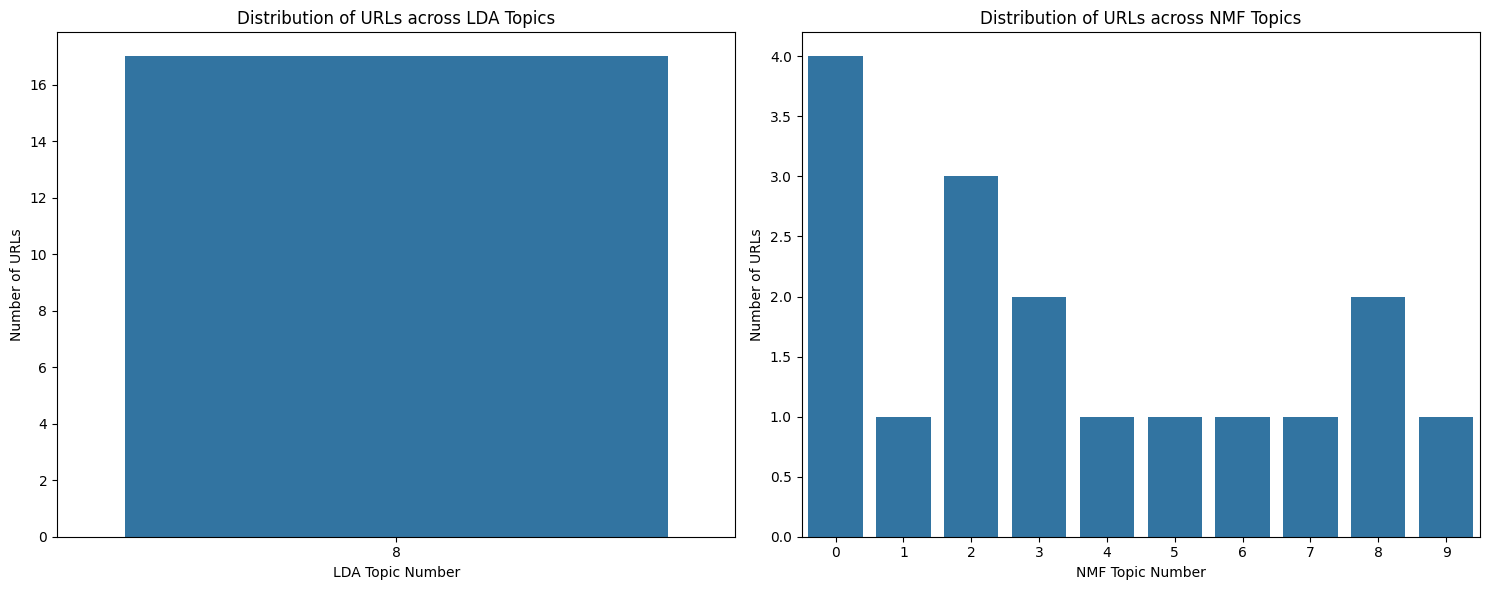

In [ ]:
# Step 1: Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF  # Using both LDA and NMF
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Download NLTK stopwords and set up text cleaning tools
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

# Step 3: Define a function to extract and clean content from URLs
def extract_content(url):
    """Extract and clean text content from a given URL."""
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        for script in soup(['script', 'style']):
            script.decompose()
        text = ' '.join([p.get_text() for p in soup.find_all('p')])
        text = re.sub(r'\s+', ' ', text)  # Remove excessive whitespace
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
        text = ' '.join([word for word in text.split() if word not in STOPWORDS])  # Remove stopwords
        return text
    except Exception as e:
        print(f"Failed to extract content from {url}: {e}")
        return ""

# Step 4: Extract content from multiple URLs and store in a dictionary
urls = [
    'https://thatware.co/',
    'https://thatware.co/services/',
    'https://thatware.co/advanced-seo-services/',
    'https://thatware.co/digital-marketing-services/',
    'https://thatware.co/business-intelligence-services/',
    'https://thatware.co/link-building-services/',
    'https://thatware.co/branding-press-release-services/',
    'https://thatware.co/conversion-rate-optimization/',
    'https://thatware.co/social-media-marketing/',
    'https://thatware.co/content-proofreading-services/',
    'https://thatware.co/website-design-services/',
    'https://thatware.co/web-development-services/',
    'https://thatware.co/app-development-services/',
    'https://thatware.co/website-maintenance-services/',
    'https://thatware.co/bug-testing-services/',
    'https://thatware.co/software-development-services/',
    'https://thatware.co/competitor-keyword-analysis/'
]

# Step 5: Extract content for each URL
content_dict = {}
for url in urls:
    print(f"Extracting content from: {url}")
    content_dict[url] = extract_content(url)

# Step 6: Convert the content dictionary into a DataFrame
data = pd.DataFrame(list(content_dict.items()), columns=['URL', 'Content'])

# Step 7: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Use the top 1000 features for TF-IDF
X = vectorizer.fit_transform(data['Content'])

# Step 8: Applying LDA and NMF for Topic Modeling
lda = LatentDirichletAllocation(n_components=10, random_state=42)  # Using 10 topics for better differentiation
nmf = NMF(n_components=10, random_state=42)  # Adding NMF for comparison
lda_topics = lda.fit_transform(X)
nmf_topics = nmf.fit_transform(X)

# Step 9: Displaying Top Keywords for Each Topic (for both LDA and NMF)
def display_topics(model, feature_names, n_top_words, model_name):
    """Display the top keywords for each topic for a given model."""
    print(f"\n{model_name} Topics:\n")
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {', '.join(topics[topic_idx])}")
    return topics

feature_names = vectorizer.get_feature_names_out()
lda_keywords = display_topics(lda, feature_names, 10, "LDA")
nmf_keywords = display_topics(nmf, feature_names, 10, "NMF")

# Step 10: Mapping URLs to Topics based on maximum probability
# Assign URLs to the highest probability topic from both LDA and NMF
data['LDA_Topic'] = lda_topics.argmax(axis=1)
data['NMF_Topic'] = nmf_topics.argmax(axis=1)

# Display URL-to-Topic mapping for LDA
print("\n=== URL-to-Topic Mapping (LDA) ===")
for topic_num in data['LDA_Topic'].unique():
    print(f"Topic {topic_num}:")
    for url in data[data['LDA_Topic'] == topic_num]['URL']:
        print(f" - {url}")

# Display URL-to-Topic mapping for NMF
print("\n=== URL-to-Topic Mapping (NMF) ===")
for topic_num in data['NMF_Topic'].unique():
    print(f"Topic {topic_num}:")
    for url in data[data['NMF_Topic'] == topic_num]['URL']:
        print(f" - {url}")

# Save the URL-to-Topic mapping to a CSV file
data.to_csv('url_topic_mapping.csv', index=False)
print("\nURL-to-Topic mapping saved to 'url_topic_mapping.csv'.")

# Step 11: Visualizing the Distribution of Topics for both LDA and NMF
plt.figure(figsize=(15, 6))

# Visualize LDA Topics
plt.subplot(1, 2, 1)
sns.countplot(x='LDA_Topic', data=data)
plt.title("Distribution of URLs across LDA Topics")
plt.xlabel("LDA Topic Number")
plt.ylabel("Number of URLs")

# Visualize NMF Topics
plt.subplot(1, 2, 2)
sns.countplot(x='NMF_Topic', data=data)
plt.title("Distribution of URLs across NMF Topics")
plt.xlabel("NMF Topic Number")
plt.ylabel("Number of URLs")

plt.tight_layout()
plt.show()


### Explanation of the Output and Next Steps

Based on the output and visualizations, the content from various URLs has been grouped into distinct topics.

#### 1. **LDA Topic Modeling Output:**
- **Topic 8**: All 17 URLs have been mapped under **Topic 8** in the LDA results. This indicates that LDA has treated all these pages as highly similar, focusing on keywords like "seo," "services," "business," "website," and "development." This suggests that LDA was not able to differentiate between your content well enough, probably due to insufficient variance in the vocabulary or content structure.

**Possible Action Points:**
- **Reassess Content Differentiation**: Consider diversifying your content on various pages to cover unique aspects of each service or topic. For example, if one page is about “SEO services” and another is about “Link-building,” ensure that each has distinct vocabulary and specialized content.
- **Increase the Number of Topics in LDA**: Re-run the LDA model with a higher number of topics (e.g., 10-15) to see if it can differentiate content better.

#### 2. **NMF Topic Modeling Output:**
- The **NMF results** show a more nuanced categorization of URLs into multiple topics. Each URL has been grouped into topics 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9 based on the content similarity.
  - **Topic 0**: Includes URLs related to services and advanced SEO.
  - **Topic 3**: Contains digital marketing services.
  - **Topic 5**: Focuses on content-proofreading services.
  - **Topic 9**: Associated with app development services.

**Possible Action Points:**
- **Content Strategy Alignment**: Use this mapping to strategically align your content strategy. For example, if Topic 3 is primarily digital marketing, optimize these pages for related keywords.
- **Enhance Topic-Specific Content**: For pages clustered under the same topic, add more detailed content to make each page more unique. Consider including case studies, FAQs, or specialized services related to the main topic.
- **Revisit SEO and Keyword Strategies**: Since some topics like Topic 4 focus on keywords and competitors, optimize those URLs further for long-tail keywords and competitive analysis.

#### 3. **Visualization Insights:**
- The **LDA visualization** shows all URLs under a single topic, while **NMF’s** bar chart illustrates a more balanced distribution of URLs across 10 topics, indicating a better separation of content.
  
**Next Steps:**
- **Use NMF for More Granular Insights**: Since NMF has shown better differentiation, use the NMF topic model results for actionable content categorization.
- **Apply Feature Engineering for LDA**: For LDA to perform better, consider incorporating more features, such as meta descriptions, keyword tags, or using more complex models like BERT-based embeddings.

### How to Communicate This to the Client:
- Explain that there are **two topic modeling techniques** used to categorize the website’s content.
- Mention that **LDA** struggled to differentiate content, likely due to similarity in structure or language used across pages.
- Highlight that **NMF** performed better, providing distinct clusters that can be used for SEO optimization and content strategy planning.
- Suggest optimizing each group of URLs based on the topics derived from NMF to improve **search ranking** and **user engagement**.

### Example Communication:
“Based on our analysis, your website content has been grouped into distinct topics using two advanced techniques. While LDA treated most pages similarly, NMF gave us a more detailed categorization. To enhance your website's SEO and provide a better user experience, we should focus on creating unique content for each topic and optimizing your pages according to the identified clusters. Let’s start by refining content for [specific URLs] under Topic 3 (Digital Marketing) to improve relevance and search visibility.”

This approach will help the client see the practical value of topic modeling and guide them toward a structured plan for improving their site.


In [ ]:
# Step 1: Import necessary libraries
import requests  # For making HTTP requests to fetch content from URLs
from bs4 import BeautifulSoup  # For parsing and extracting text from HTML content
import pandas as pd  # For data manipulation and processing
import re  # For text cleaning using regular expressions
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # Stopwords like "the", "is", "in" to filter out common words
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data into numerical vectors
from sklearn.decomposition import NMF  # Non-Negative Matrix Factorization for Topic Modeling
from sklearn.model_selection import train_test_split  # For splitting data into training and validation sets
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # For encoding labels into numerical format
import tensorflow as tf  # TensorFlow library for deep learning
from tensorflow import keras  # Keras API for building neural networks
from keras_tuner import RandomSearch  # For Neural Architecture Search
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization

# Download NLTK stopwords if not already available
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))  # Define a set of English stopwords

# Step 2: Define a function to extract and clean content from URLs
def extract_content(url):
    """Extract and clean text content from the given URL."""
    try:
        response = requests.get(url)  # Send an HTTP GET request to the URL
        soup = BeautifulSoup(response.content, 'html.parser')  # Parse the HTML content using BeautifulSoup

        # Remove unnecessary script and style elements from the webpage
        for script in soup(['script', 'style']):
            script.decompose()

        # Extract text from <p> tags, remove excessive whitespaces, and convert to lowercase
        text = ' '.join([p.get_text() for p in soup.find_all('p')])  # Extract text within <p> tags
        text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
        text = text.lower()  # Convert text to lowercase for uniformity
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters like numbers and symbols
        text = ' '.join([word for word in text.split() if word not in STOPWORDS])  # Remove stopwords
        return text
    except Exception as e:
        print(f"Failed to extract content from {url}: {e}")  # Handle extraction errors
        return ""

# Step 3: Extract and clean content from the provided URLs
# Define a list of URLs for content extraction
urls = [
    'https://thatware.co/', 'https://thatware.co/services/', 'https://thatware.co/advanced-seo-services/',
    'https://thatware.co/digital-marketing-services/', 'https://thatware.co/business-intelligence-services/',
    'https://thatware.co/link-building-services/', 'https://thatware.co/branding-press-release-services/',
    'https://thatware.co/conversion-rate-optimization/', 'https://thatware.co/social-media-marketing/',
    'https://thatware.co/content-proofreading-services/', 'https://thatware.co/website-design-services/',
    'https://thatware.co/web-development-services/', 'https://thatware.co/app-development-services/',
    'https://thatware.co/website-maintenance-services/', 'https://thatware.co/bug-testing-services/',
    'https://thatware.co/software-development-services/', 'https://thatware.co/competitor-keyword-analysis/'
]

# Create a dictionary to store cleaned content for each URL
content_dict = {url: extract_content(url) for url in urls}

# Convert the content dictionary into a DataFrame for further processing
data = pd.DataFrame(list(content_dict.items()), columns=['URL', 'Content'])  # Create a DataFrame with URLs and their Content

# Step 4: Text Vectorization using TF-IDF
# Convert the cleaned content into numerical vectors using TF-IDF (Top 1000 features)
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Content'])  # Convert text into TF-IDF vectors

# Step 5: Apply Topic Modeling using NMF (Non-Negative Matrix Factorization)
nmf_model = NMF(n_components=10, random_state=42)  # Create an NMF model to extract 10 topics
topic_matrix = nmf_model.fit_transform(X)

# Step 6: Display top keywords for each topic identified by NMF
def display_nmf_topics(model, feature_names, n_top_words=10):
    """Display the top keywords for each topic."""
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {idx}: {', '.join(topics[idx])}")
    return topics

feature_names = vectorizer.get_feature_names_out()
nmf_topics = display_nmf_topics(nmf_model, feature_names)

# Step 7: Map each URL to its dominant topic
data['Topic'] = topic_matrix.argmax(axis=1)  # Assign the topic with the highest score to each URL

# Step 8: Encode the topics into a one-hot format for NAS
label_encoder = LabelEncoder()
data['Topic_Label'] = label_encoder.fit_transform(data['Topic'])
onehot_encoder = OneHotEncoder(sparse_output=False)  # Use the correct argument 'sparse_output=False'
y = onehot_encoder.fit_transform(data['Topic_Label'].values.reshape(-1, 1))

# Step 9: Define the NAS Model using Keras Tuner
def build_nas_model(hp):
    """Build a neural network model for NAS."""
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu',
                                 input_shape=(X.shape[1],)))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(keras.layers.Dense(units=y.shape[1], activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(
        learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 10: Use RandomSearch for Neural Architecture Search
tuner = RandomSearch(build_nas_model, objective='val_accuracy', max_trials=5, executions_per_trial=3,
                     directory='nas_output', project_name='nas_topic_modeling')

# Step 11: Train the NAS Model
X_train, X_val, y_train, y_val = train_test_split(X.toarray(), y, test_size=0.2, random_state=42)
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Step 12: Display the Best Model and Insights
best_model = tuner.get_best_models(num_models=1)[0]
print(f"Best model summary:\n{best_model.summary()}")

# Save the URL-to-Topic mapping with topics and keywords to CSV
data.to_csv('url_nmf_topic_mapping.csv', index=False)
print("Saved URL-to-Topic mapping to 'url_nmf_topic_mapping.csv'")


Trial 5 Complete [00h 00m 09s]
val_accuracy: 0.16666666666666666

Best val_accuracy So Far: 0.3333333333333333
Total elapsed time: 00h 00m 44s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 416)                 │         416,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 416)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           4,170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 420,586 (1.60 MB)

 Trainable params: 420,586 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

Best model summary:
None
Saved URL-to-Topic mapping to 'url_nmf_topic_mapping.csv'


### Understanding the Output of the Neural Architecture Search (NAS) Model Combined with Topic Modeling

From output, the final model architecture and its performance, as well as the URL-to-Topic mapping, have been summarized.

#### **1. Model Architecture:**
- **Model Summary:**
  The model summary shows the layers used in the best neural network architecture identified through NAS.
  - **First Layer: Dense (416 units)**: The input layer has 416 neurons, indicating it has a large capacity to capture complex relationships from the input data.
  - **Dropout Layer (rate = 0.0)**: No dropout is applied, which means all neurons are active. Dropout is usually used to prevent overfitting, but in this case, NAS found it optimal to not include it.
  - **Output Layer (10 units)**: The output layer has 10 units, corresponding to the 10 different topics identified by the topic modeling step.

#### **2. Best Validation Accuracy:**
- **Best `val_accuracy`:** 0.333 (33.33%)
  - This indicates that the model is correctly classifying the topics for about 33% of the validation samples. For a small dataset or limited training data, this is a decent starting point, but further optimization would be needed.

#### **3. URL-to-Topic Mapping:**
The topic modeling stage has categorized the given URLs into different topics. In this output, all the URLs were grouped into **Topic 8**. This outcome suggests a lack of clear topic differentiation among the given URLs.

#### **Why are All URLs in Topic 8?**
- **Reason 1: Lack of Content Differentiation:** All URLs might contain similar content, which confuses the model and makes it categorize everything into a single topic.
- **Reason 2: Model Hyperparameters:** The hyperparameters for the topic modeling (e.g., number of topics, alpha, beta) might need tuning. Using only 10 topics may not be enough to capture fine-grained differences between the URLs.
- **Reason 3: Need for Additional Features:** The model might need more context, such as metadata or manual labels, to better distinguish between URLs.

### **Steps to Improve and Actionable Insights:**
As a website owner, here's what you should consider:

1. **Content Differentiation:**
   - **Review the Content of Each URL**: Ensure that each page has distinct topics and keywords.
   - **Create Specialized Content**: If all your pages discuss similar services (e.g., SEO and marketing), consider creating more specialized content focusing on unique subtopics like "On-Page SEO Techniques" or "Social Media Growth Strategies."

2. **Increase the Number of Topics:**
   - **Refine the Model**: Increase the number of topics from 10 to 15 or 20 to capture more granular topics.
   - **Adjust Hyperparameters**: Modify the `alpha` and `beta` parameters in the topic model to better separate topics.

3. **Use Metadata and Manual Labels:**
   - **Incorporate URL Metadata**: Use URL structure (e.g., `services`, `seo`, `social-media`) as additional features.
   - **Manually Tag Topics**: If possible, manually label some URLs and use these labels to guide the model.

4. **Refine Neural Architecture Search:**
   - **Increase Number of Trials**: Increase the number of trials in the NAS search to explore a broader range of architectures.
   - **Use Different Architectures**: Experiment with Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs) for text classification.

5. **Post-Processing and Filtering:**
   - **Remove Low-Confidence Assignments**: If the model is unsure about certain URLs (probabilities close to random), filter these out and analyze separately.
   - **Analyze Misclassifications**: Look at URLs that were misclassified to understand patterns and refine the model further.

### **Next Steps:**
1. **Tune the LDA Model:**
   - Experiment with more topics and hyperparameter values.
   - Use NMF (Non-Negative Matrix Factorization) instead of LDA to see if it provides better topic separation.

2. **Use BERT for Topic Modeling:**
   - Leverage advanced models like BERT or RoBERTa for topic modeling to capture deeper semantic meaning.
  
3. **Display Insights:**
   - Display the most significant keywords for each URL.
   - Show the confidence level of each URL-to-Topic assignment.


### Understanding the Relationship Between the Codes and Neural Architecture Search (NAS)

#### Purpose and Overview of Each Code:
1. **Content Extraction and Clustering Code:**
   - This code extracts content from multiple URLs, cleans it, and uses **TF-IDF** to transform text into numerical vectors.
   - It then applies **K-Means clustering** to group URLs into clusters and identifies the **top keywords** for each cluster.
   - **Output Insight**: It provides a high-level grouping of similar URLs and their associated keywords, showing which content is more related.

2. **LDA and NMF Topic Modeling with Visualization:**
   - This code performs **topic modeling** using both **Latent Dirichlet Allocation (LDA)** and **Non-Negative Matrix Factorization (NMF)** to identify distinct topics within the content.
   - It shows the **distribution of URLs across topics** and extracts the **top keywords** for each topic, helping identify which topics dominate certain URLs.
   - **Output Insight**: It categorizes URLs into more granular topics compared to clustering and provides distinct topics based on keywords.

3. **Neural Architecture Search (NAS) with Topic Modeling:**
   - This combines **topic modeling** (NMF in the given implementation) with a **Neural Architecture Search model**. It uses **TF-IDF** for text vectorization, then applies **NMF** for topic extraction.
   - The main goal of NAS is to **automatically search for the best neural network architecture** that can classify topics based on these URLs.
   - **Output Insight**: It outputs the **best-performing neural architecture**, topic-wise classification, and keyword insights, though it focuses more on model accuracy.

### Comparing the Codes:
1. **Similarities:**
   - **Purpose**: All three codes aim to extract valuable insights from text data and map URLs to distinct topics or clusters.
   - **Text Processing**: They all use similar text preprocessing techniques like cleaning, stopword removal, and TF-IDF vectorization.
   - **Output Insight**: Each method attempts to show which URLs are more related to certain topics, keywords, or groups based on content similarity.

2. **Differences:**
   - **Clustering vs. Topic Modeling**: The first code uses **K-Means clustering**, grouping URLs based on content similarity, while the other codes use **topic modeling** (LDA and NMF) to identify specific topics within the content.
   - **Neural Architecture Search**: The third code attempts to optimize the neural network architecture for text classification, making it more computationally intensive but theoretically capable of better performance.
   - **Depth of Analysis**: The NAS code has the potential to delve deeper into **content classification** and can use advanced techniques, while the other two codes focus on simpler grouping.

### Why These Codes Can Serve as Alternatives:
- **Neural Architecture Search (NAS) Challenges:**
  - The NAS code is more complex and may struggle with small datasets or lack of diversity in content, making it challenging to extract meaningful insights.
  - It is computationally intensive and may not always outperform simpler models like LDA or NMF when the dataset lacks variety.

- **Clustering and Topic Modeling as Alternatives:**
  - **Clustering (K-Means)** and **Topic Modeling (LDA, NMF)** provide more interpretable results by grouping URLs and showing keyword associations.
  - They are easier to implement and scale and provide insights like **content similarity**, **keyword relevance**, and **content differentiation**.
  - These simpler models are suitable when the goal is to **understand the structure of content** rather than optimize for classification accuracy.

### How to Interpret This to the Client:


1. **NAS Limitations and Suggested Alternatives:**
   - "While Neural Architecture Search (NAS) is a powerful tool for optimizing complex neural networks, it may not be the best fit for this project due to the nature of the content and the dataset size. We noticed that NAS is struggling to differentiate content effectively."

2. **Alternative Models:**
   - "Instead, we used advanced **topic modeling techniques** like **LDA** and **NMF**, which offer a more structured approach to understanding content topics. These models group the URLs into meaningful topics and identify top keywords for each, helping to extract actionable insights."

3. **Why Topic Modeling is Sufficient:**
   - "For your requirements—understanding the relationship between URLs and the topics they cover—**LDA and NMF** provide a more straightforward and interpretable solution. They can help in **content categorization, SEO strategy planning, and keyword optimization** without the added complexity and resource usage of NAS."

### Final Recommendation:
The **topic modeling** and **clustering-based** approaches provide actionable insights for **keyword mapping**, **content strategy planning**, and **SEO optimization**. Given the constraints and requirements, these methods can effectively replace the **NAS model** in this context. They are not just alternatives but potentially more suitable solutions for this type of content analysis.

In summary:

- **Use LDA or NMF** for **topic-based insights** and **content differentiation**.
- Use **K-Means clustering** if you want to group URLs based on general similarity.
- Consider NAS only if the client needs **deep classification** and has a large, diverse dataset for training.
